# chapter 2.7, animated plot exercise

In [1]:
import pandas as pd
import seaborn as sns
import pylab as plt

In [2]:
fert = pd.read_csv('/Users/maxkoeppel/SPICED/Week_1/data_week1/gapminder_total_fertility.csv', index_col=0)
fert.shape
fert.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
life = pd.read_excel('/Users/maxkoeppel/SPICED/Week_1/data_week1/gapminder_lifeexpectancy.xlsx', sep =';', index_col=0)
life.shape

(260, 217)

In [4]:
pop = pd.read_excel('/Users/maxkoeppel/SPICED/Week_1/data_week1/gapminder_population.xlsx', index_col =0)
pop.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [23]:
cont = pd.read_csv('/Users/maxkoeppel/SPICED/Week_1/data_week1/continents.csv', sep=';')
cont.shape

(194, 2)

In [6]:
life_cont=pd.merge(cont, life, right_on = ['Life expectancy'] , left_on = ['country'], how = 'inner').drop_duplicates()
life_cont.set_index('country', inplace = True)
life_cont.head()

,continent,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Algeria,Africa,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
Angola,Africa,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
Benin,Africa,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,...,59.2,59.7,60.4,60.8,61.1,61.4,61.7,62.0,62.3,62.60
Botswana,Africa,33.60,33.60,33.60,33.60,33.60,33.60,33.60,33.60,33.60,...,52.4,53.2,54.3,55.6,56.5,56.5,56.9,57.3,58.7,60.13
Burundi,Africa,31.50,31.50,31.50,31.50,31.50,31.50,31.50,31.50,31.50,...,57.9,59.1,60.0,60.4,60.8,61.1,61.3,61.4,61.4,61.40


In [7]:
life.columns # check column classifier; in life it is an integer

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [8]:
fert.columns # check column classifier; in life it is an object, which should be converted to integer

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [9]:
ncol = [int(x) for x in fert.columns] # creates a list of integers from the column names of fert

In [10]:
fert.set_axis(axis=1, labels=ncol, inplace=True) # replace column-labels/axis in fert, by the integers list

In [ ]:
fert.columns

In [ ]:
pop.columns

In [11]:
sfert = fert.stack() # generates hierachical index, transforming dataframes to the ling format
slife = life.stack()
spop = pop.stack()
slife.shape

(43857,)

In [12]:
d = { 'fertility': sfert, 'lifeexp': slife, 'population': spop} # build dictionaries from the long table versions
df2 = pd.DataFrame(data=d) # generate dataframe from the dictionary
df2.head(2)

fertility  lifeexp  population
Afghanistan 1800        7.0    28.21   3280000.0
            1801        7.0    28.20         NaN

In [13]:
df3 = df2.stack() # generating one super-long table, with several Indexes (MultiIndexed) dataframe
df3.shape

(107445,)

In [ ]:
df4 = df3.unstack((0,2)) # convert table back to the wide format, with the index number 0 and 2 from df3 as column headers
df4.head()

In [ ]:
df4[['Germany', 'France', 'Sweden']].plot(figsize = (10,7)) # plotting all variables for three countries


In [ ]:
df4 = df3.unstack((2)) # convert table back to the wide format, with the index number 0 and 2 from df3 as column headers
df4b = df4[['fertility', 'lifeexp']]

In [ ]:
df4b[['Germany', 'France', 'Sweden']].plot(figsize = (10,7)) # plotting all variables for three countries

In [ ]:
df5 = df3.unstack(2) # produces a wide (somewhat wider) format with the second index as column headers
df5.head()


In [ ]:
df5.plot.scatter('fertility', 'lifeexp', s = 0.1) # correlates fertility with lifeexptency

In [ ]:
df6 = df3.unstack(1) # produces a wide (somewhat wider) format with the first index as column, that is the year
df6.shape

In [ ]:
df6 = df6[1975].unstack(1) # selects the column of the year 1950, replaces the old df6  & puts it in a wider format
df6.head()

In [ ]:
df6.plot.scatter('fertility', 'lifeexp', s=0.1)

In [ ]:
cmap = plt.get_cmap('tab20', lut = len(df6)).colors # improving graphics by coloring countriesindividually, the lut parameter gives colors according to the number given

In [ ]:
df6.plot.scatter('fertility', 'lifeexp', s=0.1, c=cmap)

In [ ]:
df6.plot.scatter('fertility', 'lifeexp', s=df6['population']*0.000001, c=cmap)
plt.axis((1,9,10,90))

### get to the cool animation
* after adjusting size by population, by scaling down millions of people by a factor of 1 mio (s.a.)
* automate the picture generation for the years from 1960 to 2015 and save them with the individual year in the name.

In [15]:
df_test = df3.unstack(1) # branches of at the end of step 8 in the 2.7 Long vs Wide exercise
df_test = df_test.iloc[:,160:215] # select the years 1960 to 2015 based on column index-number
df_test.head()

1960        1961        1962  \
Afghanistan           fertility         7.67        7.67        7.67   
                      lifeexp          31.94       32.47       33.01   
                      population  8994793.00  9164945.00  9343772.00   
Akrotiri and Dhekelia population    11439.00    11519.00    11601.00   
Albania               fertility         6.19        6.08        5.96   

                                        1963        1964        1965  \
Afghanistan           fertility         7.67        7.67        7.67   
                      lifeexp          33.53       34.07       34.60   
                      population  9531555.00  9728645.00  9935358.00   
Akrotiri and Dhekelia population    11683.00    11765.00    11848.00   
Albania               fertility         5.83        5.71        5.59   

                                         1966         1967         1968  \
Afghanistan           fertility          7.67         7.67         7.67   
                      lifeexp           35.13        35.66        36.17   
                      population  10148841.00  10368600.00  10599790.00   
Akrotiri and Dhekelia population     11932.00     12016.00     12101.00   
Albania               fertility          5.48         5.38         5.27   

                                         1969  ...         2005         2006  \
Afghanistan           fertility          7.67  ...         6.93         6.70   
                      lifeexp           36.69  ...        52.00        52.10   
                      population  10849510.00  ...  24399948.00  25183615.00   
Akrotiri and Dhekelia population     12187.00  ...     15700.00     15700.00   
Albania               fertility          5.16  ...         1.92         1.85   

                                         2007         2008         2009  \
Afghanistan           fertility          6.46         6.20         5.93   
                      lifeexp           52.40        52.80        53.30   
                      population  25877544.00  26528741.00  27207291.00   
Akrotiri and Dhekelia population     15700.00     15700.00          NaN   
Albania               fertility          1.80         1.76         1.74   

                                         2010         2011         2012  \
Afghanistan           fertility          5.66         5.40         5.14   
                      lifeexp           53.60        54.00        54.40   
                      population  27962207.00  28809167.00  29726803.00   
Akrotiri and Dhekelia population          NaN          NaN          NaN   
Albania               fertility          1.74         1.75         1.76   

                                         2013         2014  
Afghanistan           fertility          4.90         4.68  
                      lifeexp           54.80        54.90  
                      population  30682500.00  31627506.00  
Akrotiri and Dhekelia population          NaN          NaN  
Albania               fertility          1.77         1.78  

[5 rows x 55 columns]

In [16]:
cmap = plt.get_cmap('tab20', lut = len(temp)).colors # improving graphics by coloring countries individually, the lut parameter gives colors according to the number given


NameError: name 'temp' is not defined

the following for-loop takes as input each of the columns given in the selected dataframe and performs the indiviudal operations done before, just on temporary files, that is select each column, unstack it on the index-level 1, generate the plot as detailed above. Then it is saved under with the year in its name given as placeholder '%s' in the appropriate folder.

In [22]:
temp=df_test[i].unstack(1)
temp.shape

(256, 3)

In [ ]:
for i in df_test.columns:
    temp=df_test[i].unstack(1)
    temp.plot.scatter('fertility',  'lifeexp', s=temp['population']*0.000001, c = cmap)
    plt.axis((1,9,10,90))
    plt.title(str(i))
    plt.savefig('/Users/maxkoeppel/SPICED/Week_1/scripts_week1/2.7_yearly_population_blots_mk/lifeexp_%s.png' %i)

In [ ]:
import imageio

images = []

for i in range(1960,2014):
    filename = '/Users/maxkoeppel/SPICED/Week_1/scripts_week1/2.7_yearly_population_blots_mk/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('/Users/maxkoeppel/SPICED/Week_1/output.gif', images, fps=5)

In [21]:
temp=df_test[1985].unstack(1)
temp.index.name = 'country'
temp2 = pd.merge(temp, cont, right_on = ['country'] , left_on = ['country'], how = 'right').drop_duplicates()
temp2.shape

(194, 5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


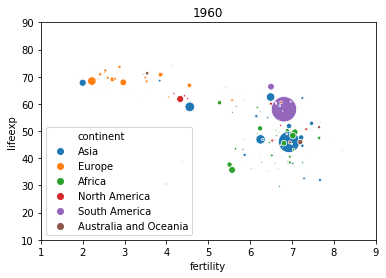

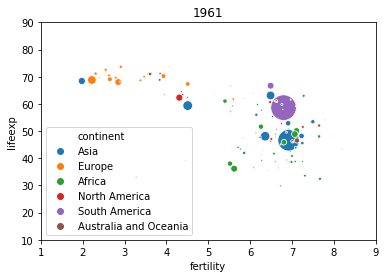

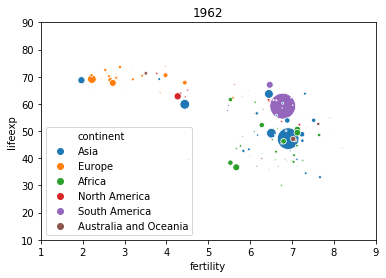

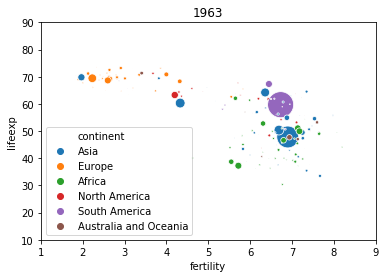

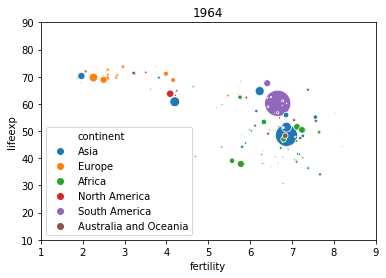

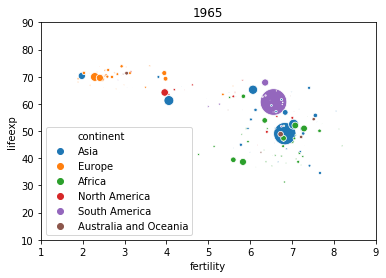

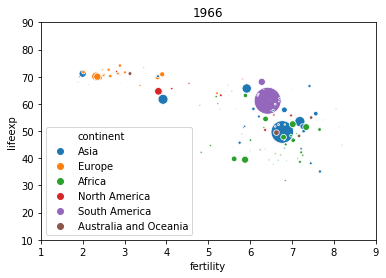

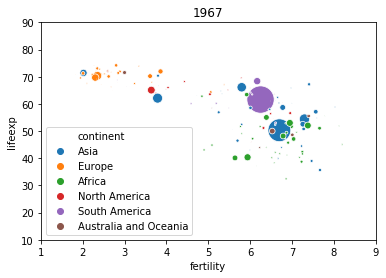

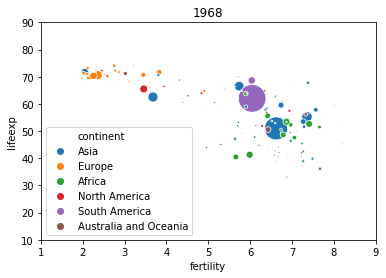

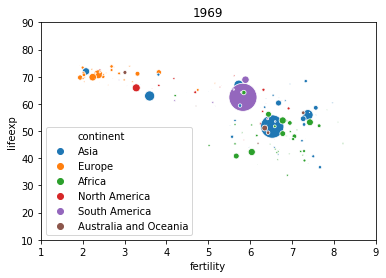

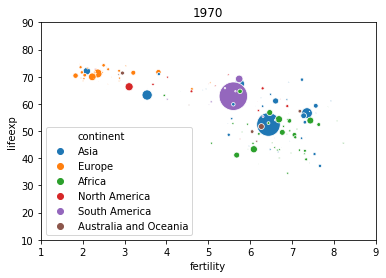

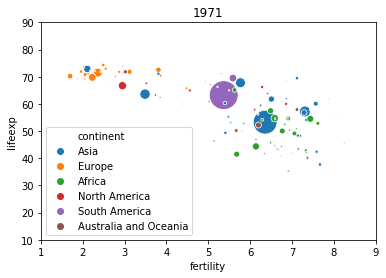

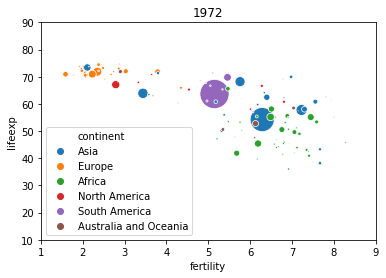

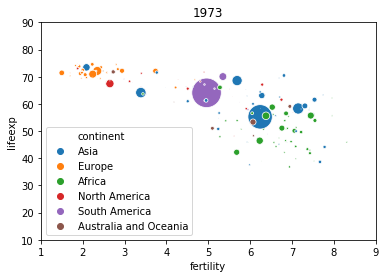

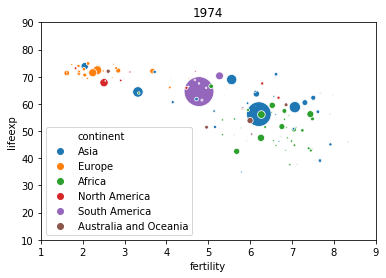

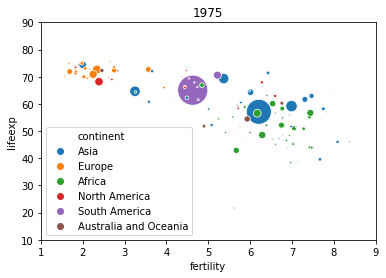

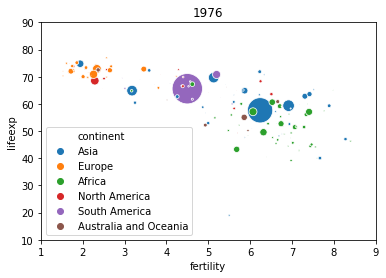

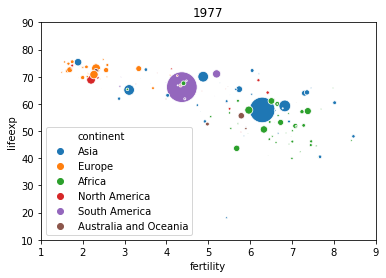

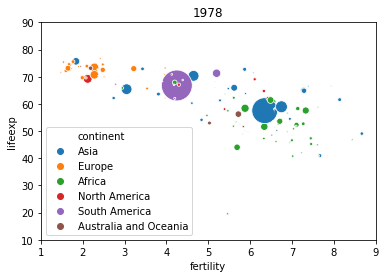

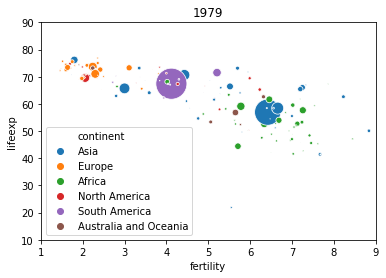

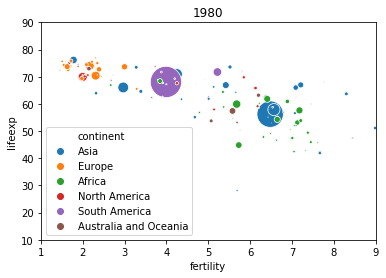

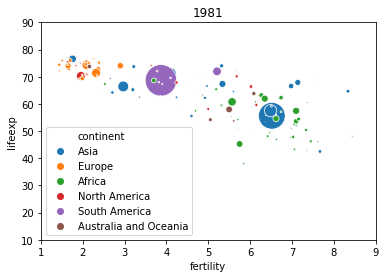

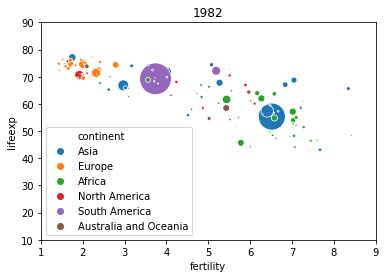

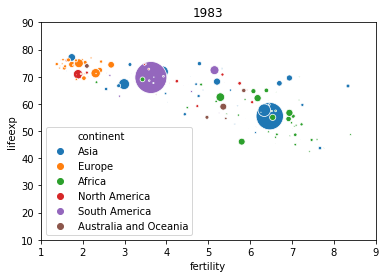

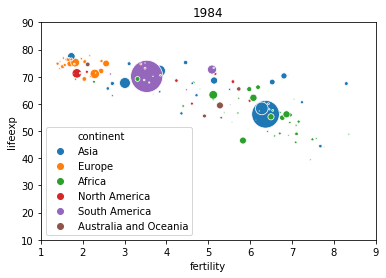

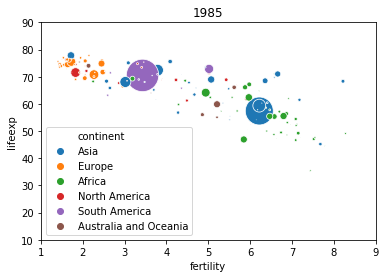

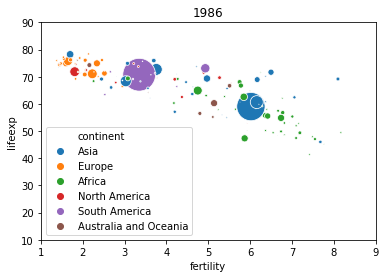

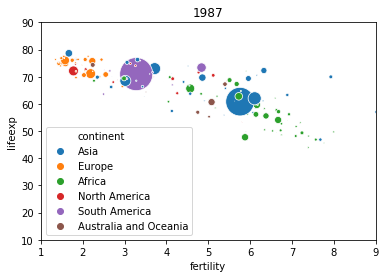

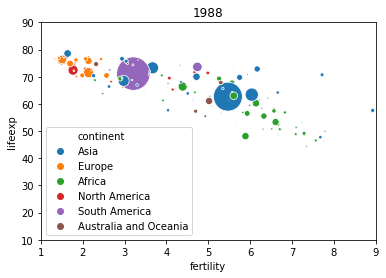

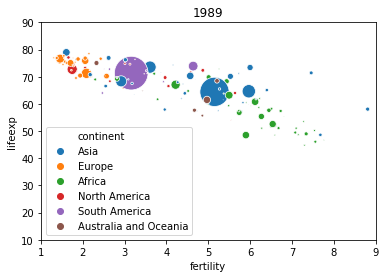

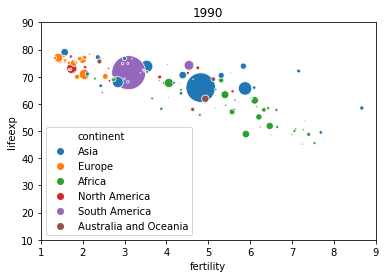

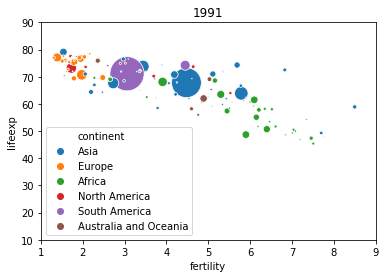

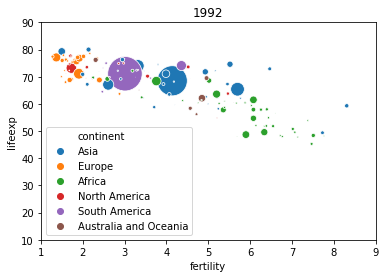

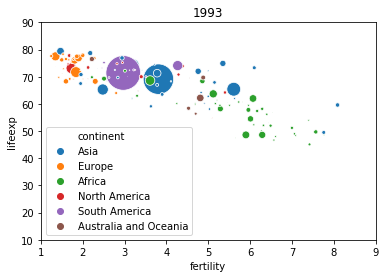

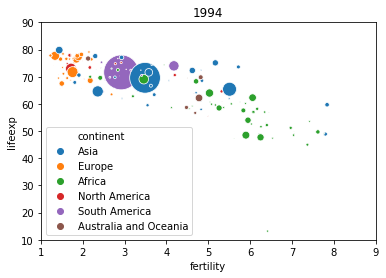

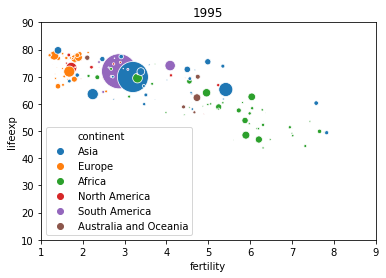

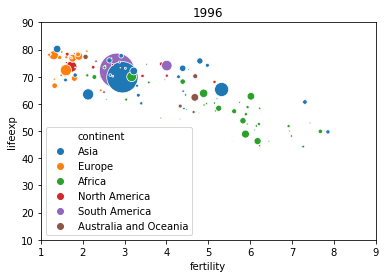

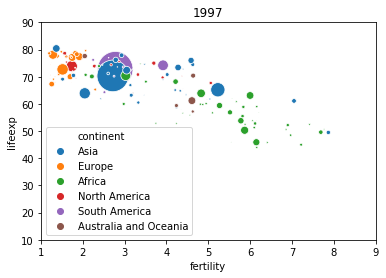

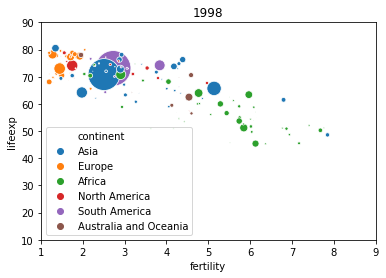

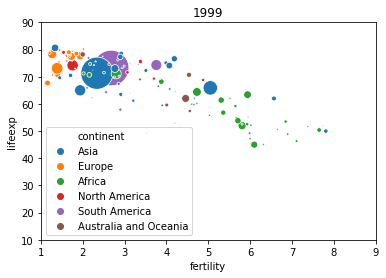

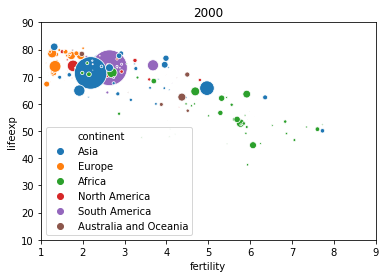

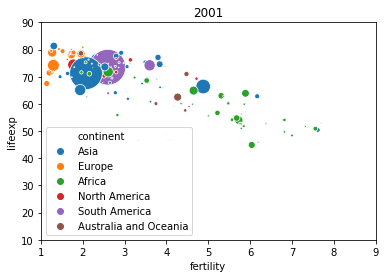

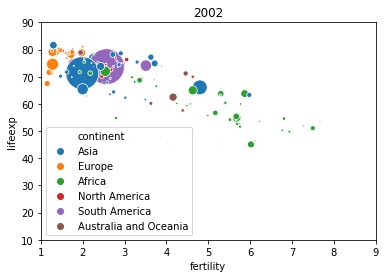

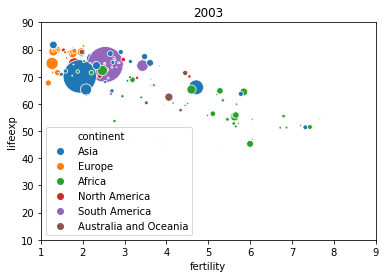

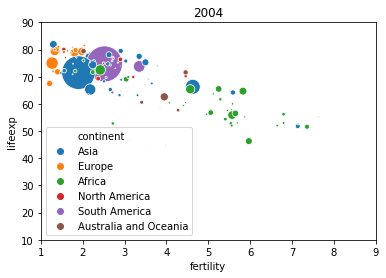

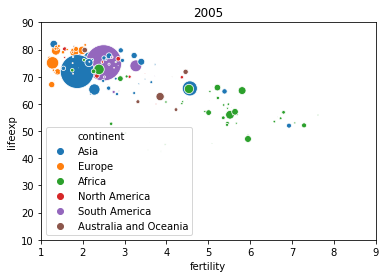

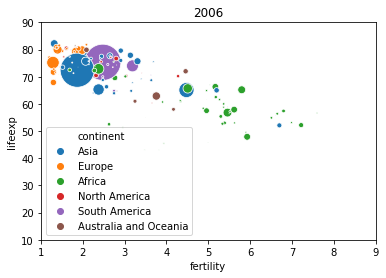

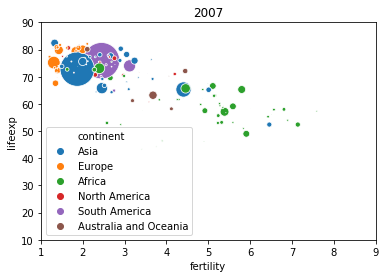

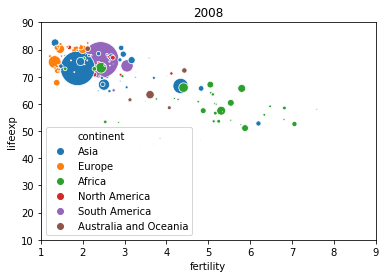

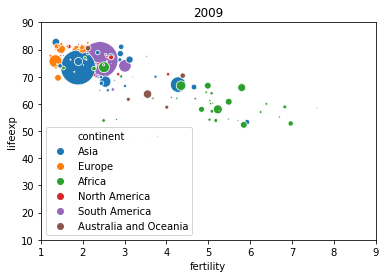

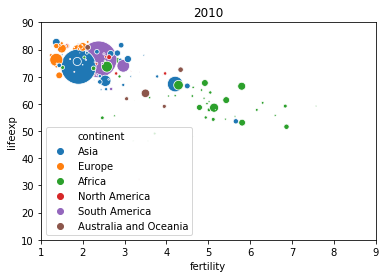

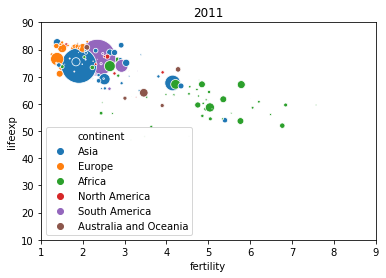

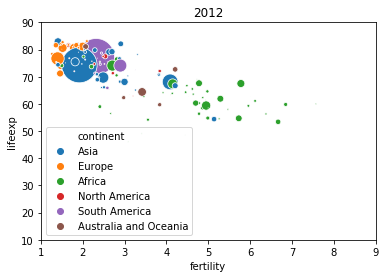

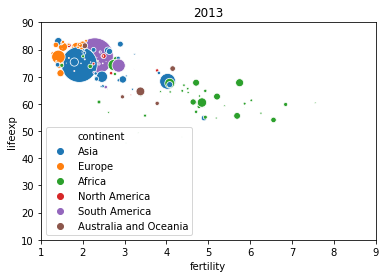

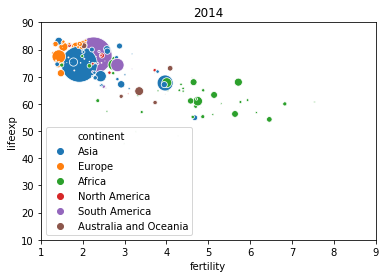

In [26]:
for i in df_test.columns:
    temp=df_test[i].unstack(1)
    temp.index.name = 'country'
    temp2 = pd.merge(temp, cont, right_on = ['country'] , left_on = ['country'], how = 'right').drop_duplicates()
    plt.figure(i)
    sns.scatterplot(data = temp2, x = 'fertility', y= 'lifeexp', s=temp2['population']*0.000001, hue = 'continent')
    plt.title(str(i))
    plt.legend(loc = 'lower left')
    plt.axis((1,9,10,90))
    plt.savefig('/Users/maxkoeppel/SPICED/Week_1/scripts_week1/2.7_yearly_population_blots_mk/lifeexp_%s.png' %i)

In [27]:
import imageio

images = []

for i in range(1960,2014):
    filename = '/Users/maxkoeppel/SPICED/Week_1/scripts_week1/2.7_yearly_population_blots_mk/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('/Users/maxkoeppel/SPICED/Week_1/seaborn_output.gif', images, fps=5)